In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import pandas as pd
from datetime import datetime
from data_preparation import get_data

In [2]:
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')
hum = pd.read_csv(path + '/ds_humidity.csv')
temp = pd.read_csv(path + '/ds_temperature.csv')
case = pd.read_csv(path + '/case.csv')
equipment = pd.read_csv(path + '/equipment.csv')
facility = pd.read_csv(path + '/facility.csv')

/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM 1

In [100]:
anom = elec[elec.io_id == '5e03a7a2832a17ee33585ea4'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')

In [101]:
df = get_data(anom.loc[532778 - 720 * 2:532778 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:]
N = len(df)
L = 20 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([df[i:i+L] for i in range(0,K)])

In [102]:
df

array([0.00266667, 0.00266667, 0.003     , ..., 0.00283333, 0.00275   ,
       0.00275   ])

In [103]:
X

array([[0.00266667, 0.00266667, 0.003     , ..., 0.00283333, 0.00275   ,
        0.0025    ],
       [0.00266667, 0.003     , 0.00291667, ..., 0.00275   , 0.0025    ,
        0.00266667],
       [0.003     , 0.00291667, 0.00266667, ..., 0.0025    , 0.00266667,
        0.00283333],
       ...,
       [0.00266667, 0.00275   , 0.00275   , ..., 0.00275   , 0.00291667,
        0.00283333],
       [0.00275   , 0.00275   , 0.003     , ..., 0.00291667, 0.00283333,
        0.00275   ],
       [0.00275   , 0.003     , 0.00283333, ..., 0.00283333, 0.00275   ,
        0.00275   ]])

In [104]:
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=L) #, groups=groups)
X_ssa = ssa.fit_transform(X)

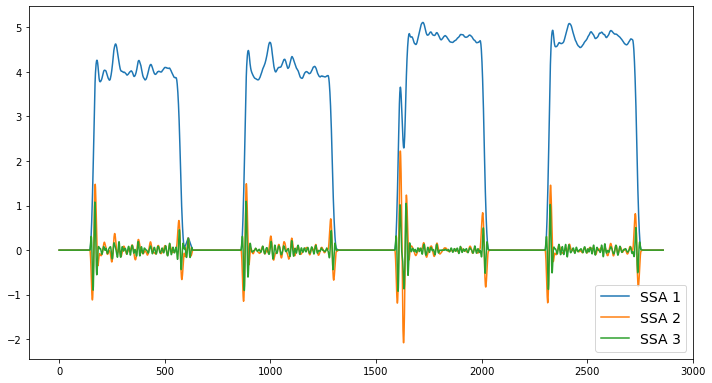

In [107]:
plt.figure(figsize=(10, 6))

#ax1 = plt.subplot(121)
#ax1.plot(X[0], 'o-', label='Original')
#ax1.legend(loc='best', fontsize=14)
#
#ax2 = plt.subplot(122)
for i in range(len(groups)):
    plt.plot(X_ssa[0, i], label='SSA {0}'.format(i + 1))
plt.legend(loc='best', fontsize=14)

#plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('aaa.png')

# ANOM 2

No handles with labels found to put in legend.


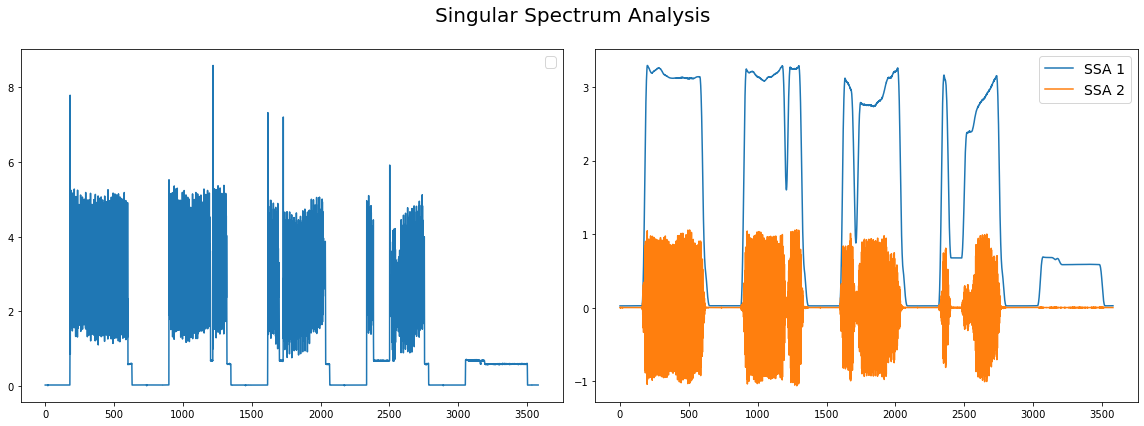

In [7]:
anom = elec[elec.io_id == '60d31a0ae7c20e0e57f9c6b8'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 71905
before = 1
after = 4

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:]
N = len(df)
L = 20 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([df[i:i+L] for i in range(0,K)])

groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=L) #, groups=groups)
X_ssa = ssa.fit_transform(X)

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0])
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(2):
    ax2.plot(X_ssa[0, i], label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


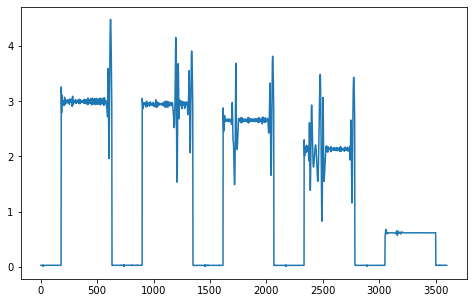

In [15]:
plt.figure(figsize=(8, 5))
df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:]
plt.plot(np.arange(len(df)), df)

# ANOM 3

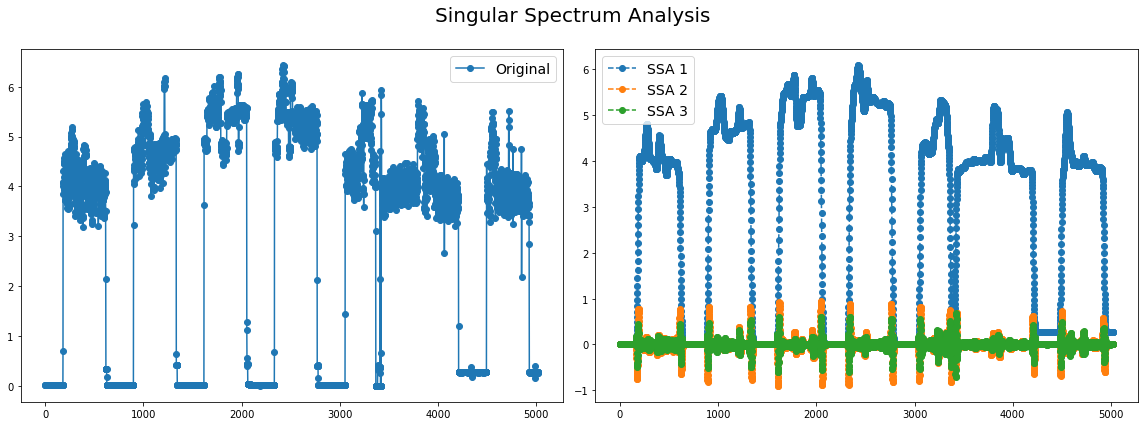

In [79]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 335773
before = 4
after = 3

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:]
N = len(df)
L = 20 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([df[i:i+L] for i in range(0,K)])

groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=L) #, groups=groups)
X_ssa = ssa.fit_transform(X)

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# ANOM 4

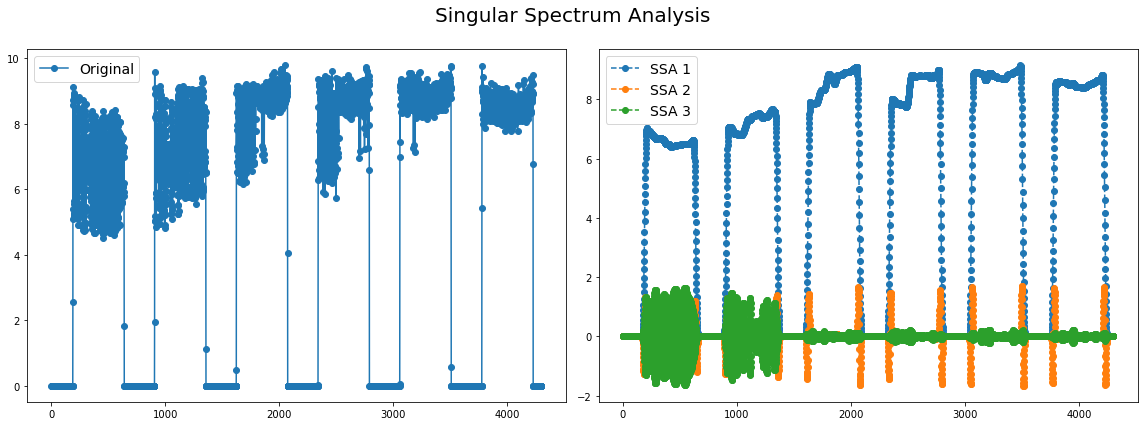

In [80]:
anom = elec[elec.io_id == '612ca610bdd0fcc66ed23613'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 39402
before = 2
after = 4

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:]
N = len(df)
L = 20 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([df[i:i+L] for i in range(0,K)])

groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=L) #, groups=groups)
X_ssa = ssa.fit_transform(X)

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# ANOM 5

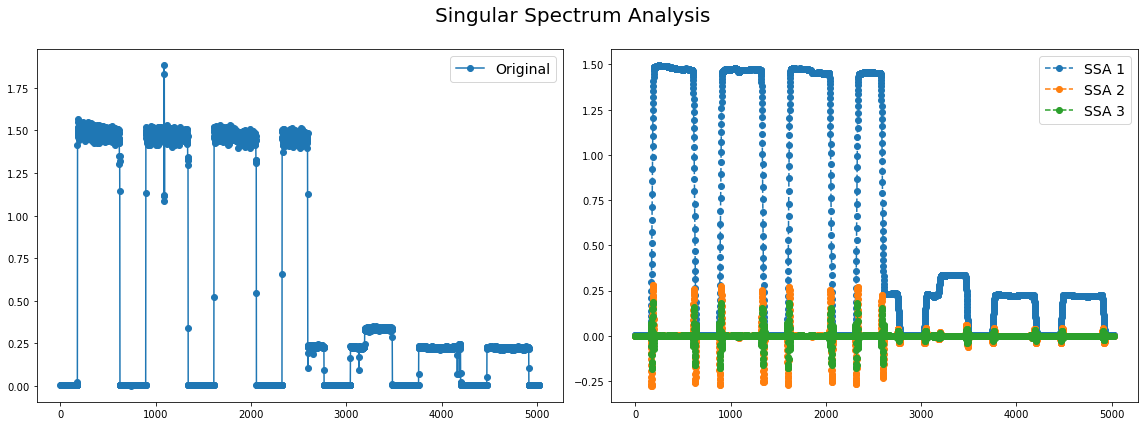

In [83]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 164019
before = 3
after = 4

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:]
N = len(df)
L = 20 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([df[i:i+L] for i in range(0,K)])

groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=L) #, groups=groups)
X_ssa = ssa.fit_transform(X)

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# ANOM 6

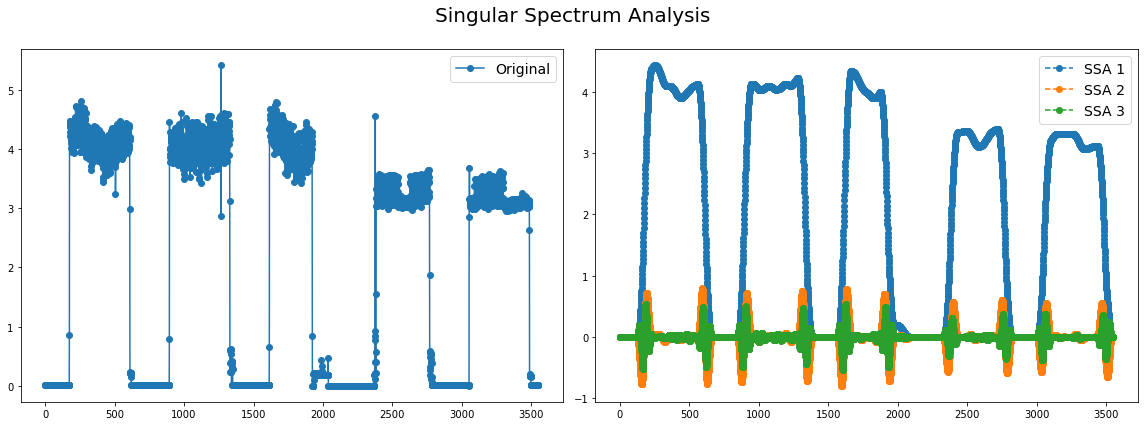

In [87]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 390482
before = 2
after = 3

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:]
N = len(df)
L = 50 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([df[i:i+L] for i in range(0,K)])

groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=L) #, groups=groups)
X_ssa = ssa.fit_transform(X)

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()